In [61]:
import torch
from torch.utils import data
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Time varying signal

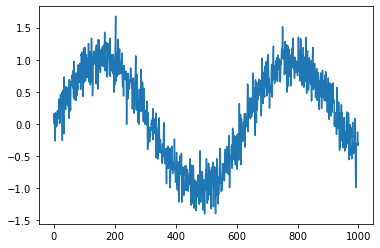

In [51]:
N = 1000
t = np.arange(N)
x = np.sin(0.01*t) + 0.2 * np.random.normal(size=N)
plt.plot(x)

$$y_t = data_t, x_t = data_{t-1}... data_{t-1-M}$$

# Define features & labels

- input is a history of points of size k: $x[0:k]$
- output is the point at time k+1 given k points: $x[k]$

In [52]:
M = 10
i = 1
# history of 10 for signal x: x[0:10]
print(i, i+M)
print(x[i:i + (M)])
print(i, i+(M+1))
print(x[i:i + (M+1)])
print(i+M)
print(x[i+M])

1 11
[ 0.1580547   0.09277265  0.15995928 -0.26619265  0.09997692  0.17304537
  0.16506549 -0.04168923  0.06265304  0.14518473]
1 12
[ 0.1580547   0.09277265  0.15995928 -0.26619265  0.09997692  0.17304537
  0.16506549 -0.04168923  0.06265304  0.14518473 -0.02147971]
11
-0.02147971173572076


In [53]:
X = []
y = []
for i in range(0, N-M):
    X.append(x[i:(i+M)])
    y.append(x[i+M])

In [58]:
print(X[0],y[0])
print(X[1],y[1])

[ 0.00676833  0.1580547   0.09277265  0.15995928 -0.26619265  0.09997692
  0.17304537  0.16506549 -0.04168923  0.06265304] 0.14518473451656394
[ 0.1580547   0.09277265  0.15995928 -0.26619265  0.09997692  0.17304537
  0.16506549 -0.04168923  0.06265304  0.14518473] -0.02147971173572076


# Create pytorch dataset

this will allow use to use pytorch dataloader class to define batches and potentially paralellize processing per batch

In [ ]:
class TimeDataset(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, features, labels):
        'Initialization'
        self.labels = labels
        self.features = features
        
  def __len__(self):
        'Denotes the total number of samples'
        return len(self.features)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        sample = self.features[index]

        # Load data and get label
        X = self.features[index]
        y = self.labels[index]

        return X, y